In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-32-52584794ae50>:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_mask = mask.resize((new_width, new_height), Image.ANTIALIAS)


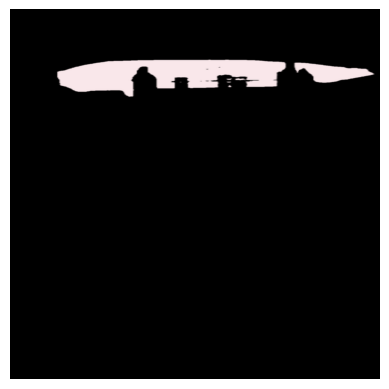

In [32]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the mask image from Google Drive
# mask_path = "/content/drive/MyDrive/Colab Notebooks/car_mask.png"  # Update this path
# mask = Image.open(mask_path).convert("RGBA")  # Ensure transparency is preserved

# # Define the canvas size and create a black canvas
# canvas_size = (900, 900)  # Example: 900x900 pixels, adjust as needed
# canvas = Image.new("RGBA", canvas_size, (0, 0, 0, 255))  # Black canvas

# # Define the grid size
# grid_size = (3, 3)  # 3x3 grid
# cell_width = canvas_size[0] // grid_size[0]
# cell_height = canvas_size[1] // grid_size[1]

# # Function to calculate grid positions
# def get_grid_coordinates(grid_positions):
#     """Calculate top-left and bottom-right coordinates of the mask based on grid positions."""
#     min_pos = min(grid_positions)
#     max_pos = max(grid_positions)

#     # Calculate top-left coordinates
#     top_left_x = ((min_pos - 1) % grid_size[0]) * cell_width
#     top_left_y = ((min_pos - 1) // grid_size[0]) * cell_height

#     # Calculate bottom-right coordinates
#     bottom_right_x = ((max_pos - 1) % grid_size[0] + 1) * cell_width
#     bottom_right_y = ((max_pos - 1) // grid_size[0] + 1) * cell_height

#     return top_left_x, top_left_y, bottom_right_x, bottom_right_y

# # Example grid positions (1-based indexing)
# grid_positions = [1,3]  # Modify as per your requirement

# # Calculate the grid coordinates
# top_left_x, top_left_y, bottom_right_x, bottom_right_y = get_grid_coordinates(grid_positions)

# # Resize the mask to fit within the calculated grid area
# new_width = bottom_right_x - top_left_x
# new_height = bottom_right_y - top_left_y
# resized_mask = mask.resize((new_width, new_height), Image.ANTIALIAS)

# # Paste the mask onto the canvas at the calculated top-left position
# canvas.paste(resized_mask, (top_left_x, top_left_y), resized_mask)

# # Convert the canvas to a format that can be displayed using matplotlib
# canvas_np = np.array(canvas)

# # Display the result using matplotlib
# plt.imshow(canvas_np)
# plt.axis('off')  # Hide axes
# plt.show()




In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, degrees

# Load the mask image from Google Drive
mask_path = "/content/drive/MyDrive/Colab Notebooks/car_mask.png"  # Update this path
mask = Image.open(mask_path).convert("RGBA")  # Ensure transparency is preserved

# Define the canvas size and create a black canvas
canvas_size = (900, 900)  # Example: 900x900 pixels, adjust as needed
canvas = Image.new("RGBA", canvas_size, (0, 0, 0, 255))  # Black canvas

# Define the grid size
grid_size = (3, 3)  # 3x3 grid
cell_width = canvas_size[0] // grid_size[0]
cell_height = canvas_size[1] // grid_size[1]


# Function to calculate grid positions
def get_grid_coordinates(grid_positions):
    """Calculate top-left and bottom-right coordinates of the mask based on grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    # Calculate top-left coordinates
    top_left_x = ((min_pos - 1) % grid_size[0]) * cell_width
    top_left_y = ((min_pos - 1) // grid_size[0]) * cell_height

    # Calculate bottom-right coordinates
    bottom_right_x = ((max_pos - 1) % grid_size[0] + 1) * cell_width
    bottom_right_y = ((max_pos - 1) // grid_size[0] + 1) * cell_height

    return top_left_x, top_left_y, bottom_right_x, bottom_right_y

# Function to calculate the rotation angle using trigonometry
def calculate_rotation_angle(grid_positions):
    """Calculate the rotation angle based on the grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    start_row = (min_pos - 1) // grid_size[0]
    end_row = (max_pos - 1) // grid_size[0]
    start_col = (min_pos - 1) % grid_size[0]
    end_col = (max_pos - 1) % grid_size[0]

    print("start_row",start_row)
    print("end_row",end_row)
    print("start_col",start_col)
    print("end_col",end_col)

    # Calculate the height and width of the grid span
    height = abs((end_row - start_row + 1) * cell_height)
    width = abs((end_col - start_col + 1) * cell_width)

    # Debugging output
    print(f"Grid span - Height: {height}, Width: {width}")

    # Check if the mask is purely vertical or horizontal
    if height == cell_height or width == cell_width:
        return 0  # No rotation for purely vertical or horizontal spans

    # Calculate the rotation angle in degrees
    angle_rad = atan2(height, width)
    angle_deg = degrees(angle_rad)
    return angle_deg

# Example grid positions (1-based indexing)
grid_positions = [1,2,3]  # Modify as per your requirement

# Calculate the grid coordinates
top_left_x, top_left_y, bottom_right_x, bottom_right_y = get_grid_coordinates(grid_positions)

# Validate the calculated dimensions
new_width = max(1, bottom_right_x - top_left_x)
new_height = max(1, bottom_right_y - top_left_y)

# Resize the mask to fit within the calculated grid area
resized_mask = mask.resize((new_width, new_height), Image.LANCZOS)

# Calculate the rotation angle
rotation_angle = calculate_rotation_angle(grid_positions)

# Debugging output
print(f"Rotation angle: {rotation_angle}")

# Rotate the mask if needed
if rotation_angle != 0:
    rotated_mask = resized_mask.rotate(rotation_angle, expand=True)
else:
    rotated_mask = resized_mask

# Calculate new top-left coordinates to center the rotated mask in the grid area
new_top_left_x = top_left_x + (new_width - rotated_mask.width) // 2
new_top_left_y = top_left_y + (new_height - rotated_mask.height) // 2

# Paste the rotated mask onto the canvas at the calculated top-left position
canvas.paste(rotated_mask, (new_top_left_x, new_top_left_y), rotated_mask)

# Convert the canvas to a format that can be displayed using matplotlib
canvas_np = np.array(canvas)

# Display the result using matplotlib
plt.imshow(canvas_np)
plt.axis('off')  # Hide axes
plt.show()
